Tóm tắt
Từ giá hiện tại: Bạn mô phỏng giá tài sản cơ sở trong tương lai.
Tính được giá tương lai: Dựa trên giá tài sản cơ sở mô phỏng, tính giá trị quyền chọn tại thời điểm đáo hạn.
Tính được giá quyền chọn tương lai: Xác định giá trị quyền chọn tại thời điểm đáo hạn.
Tính được giá quyền chọn hiện tại: Chiết khấu giá trị quyền chọn từ thời điểm đáo hạn về thời điểm hiện tại để có giá trị hiện tại của quyền chọn.

In [2]:
import numpy.random as npr
import numpy as np
import math
def gen_sn(M, I, anti_paths=True, mo_match=True):
    ''' Function to generate random numbers for simulation.
    Parameters
    ==========
    M: int
    number of time intervals for discretization
    I: int
    number of paths to be simulated
    anti_paths: boolean
    use of antithetic variates
    mo_math: boolean
    use of moment matching
    '''
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn
# ----------Tđịnh giá quyền chọn mua châu Âu (European call option) theo mô hình Black-Scholes-Merton (BSM) bằng cách sử dụng mô phỏng Monte Carlo.---
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

def gbm_mcs_stat(K):
    ''' Valuation of European call option in Black-Scholes-Merton
    by Monte Carlo simulation (of index level at maturity)
    Parameters
    ==========
    K: float
    (positive) strike price of the option
    Return=======
    C0: float
    estimated present value of European call option
    '''
    sn = gen_sn(1, I)
    # simulate index level at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T
    + sigma * math.sqrt(T) * sn[1])
    # calculate payoff at maturity
    hT = np.maximum(ST - K, 0)
    # calculate MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0
ans = gbm_mcs_stat(105)
# Giá trị hiện tại ước tính của quyền chọn mua châu Âu: Kết quả của hàm gbm_mcs_stat là khoảng 10.04, 
# có nghĩa là giá trị hiện tại của quyền chọn mua châu Âu với giá thực hiện là 105 (K = 105) được ước tính là khoảng 10.04 đơn vị tiền tệ.


In [3]:
# Mở rộng phương pháp định giá quyền chọn bằng Monte Carlo mô phỏng cho cả quyền chọn mua (call option) và quyền chọn bán (put option) của châu Âu. 
# Hàm gbm_mcs_dyna được sử dụng để mô phỏng các đường đi của giá 
# cổ phiếu theo thời gian và tính toán giá trị hiện tại của quyền chọn mua hoặc bán.
M = 50 
def gbm_mcs_dyna(K, option='call'):
    ''' Valuation of European options in Black-Scholes-Merton
    by Monte Carlo simulation (of index level paths)
    Parameters
    ==========
    K: float
    (positive) strike price of the option
    option : string
    type of the option to be valued ('call', 'put')
    Returns
    =======
    C0: float
    estimated present value of European call option
    '''
    dt = T / M
    # simulation of index level paths
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
        + sigma * math.sqrt(dt) * sn[t])
        # case-based calculation of payoff
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)
    # calculation of MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0
a = gbm_mcs_dyna(K=110., option='call') 
b = gbm_mcs_dyna(K=110., option='put') 
print(a)
print(b)
# Quyền chọn mua (Call Option): Quyền mua cổ phiếu với giá thực hiện trong tương lai. Bạn mua quyền chọn này nếu dự đoán giá cổ phiếu sẽ tăng.
# Quyền chọn bán (Put Option): Quyền bán cổ phiếu với giá thực hiện trong tương lai. Bạn mua quyền chọn này nếu dự đoán giá cổ phiếu sẽ giảm.

7.961222335291823
12.667130040655648


In [4]:
def bsm_call_value(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model.
    Analytical formula.
    Parameters
    ==========
    S0: float
    initial stock/index level
    K: float
    strike price
    T: float
    maturity date (in year fractions)
    r: float
    constant risk-free short rate
    sigma: float
    volatility factor in diffusion term
    Returns
    =======
    value: float
    present value of the European call option
    '''
    from math import log, sqrt, exp
    from scipy import stats
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    # stats.norm.cdf --> cumulative distribution function
    # for normal distribution
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0) -
    K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value

Chú ý :
Công Thức Black-Scholes-Merton (BSM):
    Công thức Black-Scholes-Merton (BSM) cung cấp một giải pháp chính xác và phân tích cho việc định giá quyền chọn châu Âu. Nó dựa trên một số giả định:

        Chuyển động Brown Hình học: Giá tài sản cơ sở theo một quá trình ngẫu nhiên với biến động đồng đều.
        Thị trường hoàn hảo: Không có chi phí giao dịch, và các tài sản có thể được mua hoặc bán mà không có ảnh hưởng đến giá.
        Lãi suất không rủi ro: Được giả định là không thay đổi theo thời gian.
        Độ biến động ổn định: Được giả định là không thay đổi theo thời gian.
Phương Pháp Mô Phỏng Monte Carlo
    Phương pháp mô phỏng Monte Carlo là một kỹ thuật dựa trên việc mô phỏng nhiều kịch bản ngẫu nhiên để ước lượng giá trị của quyền chọn. Nó không yêu cầu các giả định như công thức BSM, và do đó có thể được áp dụng cho các quyền chọn phức tạp hơn, chẳng hạn như quyền chọn kiểu Mỹ hoặc các quyền chọn có đặc điểm đặc biệt.

    Quy Trình Mô Phỏng Monte Carlo:
    Tạo các số ngẫu nhiên: Sinh ra các chuỗi số ngẫu nhiên để mô phỏng các kịch bản của giá tài sản cơ sở trong tương lai.
    Mô phỏng các đường đi của giá: Sử dụng các số ngẫu nhiên để tạo ra nhiều đường đi khác nhau của giá cổ phiếu.
    Tính toán giá trị quyền chọn: Đối với mỗi kịch bản, tính giá trị quyền chọn tại ngày đáo hạn.
    Tính giá trị kỳ vọng: Tính giá trị trung bình của các giá trị quyền chọn từ tất cả các kịch bản và chiết khấu về hiện tại để có được giá trị quyền chọn ước lượng.

So Sánh
-Công Thức BSM:

    Ưu điểm: Chính xác và nhanh chóng nếu các giả định của mô hình được thoả mãn.
    Nhược điểm: Chỉ áp dụng cho quyền chọn châu Âu và không thể xử lý các tình huống phức tạp như quyền chọn kiểu Mỹ hay các quyền chọn có đặc điểm đặc biệt.
-Phương Pháp Mô Phỏng Monte Carlo:

    Ưu điểm: Linh hoạt và có thể xử lý các quyền chọn phức tạp và điều kiện không tiêu chuẩn.
    Nhược điểm: Có thể yêu cầu tính toán lớn và thời gian chạy lâu hơn, đặc biệt là khi số lượng mô phỏng cần thiết cao.
Kết Luận
Công thức BSM cung cấp một cách nhanh chóng và chính xác để định giá quyền chọn châu Âu khi các giả định của mô hình được thoả mãn.
Phương pháp mô phỏng Monte Carlo cung cấp sự linh hoạt trong việc định giá các quyền chọn phức tạp và không yêu cầu các giả định mạnh mẽ như công thức BSM.

In [14]:
#  So sánh 3 mô hình tính toán gbm_mcs_stat,gbm_mcs_dyna,bsm_call_value

stat_res = []
dyna_res = []
anal_res = []
k_list = np.arange(80,120.1,5.)
for k in k_list :
    stat_res.append(gbm_mcs_stat(k))
    dyna_res.append(gbm_mcs_dyna(k))
    anal_res.append(bsm_call_value(S0,k,T,r,sigma))
print('Stat res :',np.array(stat_res))
print('Dyna res :',np.array(dyna_res))
print('anal res :',np.array(anal_res))
stat_res = np.array(stat_res)
dyna_res = np.array(dyna_res)
anal_res = np.array(anal_res)


Stat res : [25.47772183 21.64456273 18.1597559  14.99206582 12.33409824 10.08540803
  8.0361578   6.34148798  5.00396078]
Dyna res : [25.37265957 21.58569341 18.1041017  15.02505671 12.24938682 10.10745011
  8.02540097  6.49543468  4.97363967]
anal res : [25.412512   21.60571354 18.14076295 15.04705034 12.33599893 10.00220212
  8.02638469  6.37924905  5.02541348]


K_list: [ 80.  85.  90.  95. 100. 105. 110. 115. 120.]
analytical: [25.412512   21.60571354 18.14076295 15.04705034 12.33599893 10.00220212
  8.02638469  6.37924905  5.02541348]
static: [25.47772183 21.64456273 18.1597559  14.99206582 12.33409824 10.08540803
  8.0361578   6.34148798  5.00396078]


(75.0, 125.0)

<Figure size 1000x600 with 0 Axes>

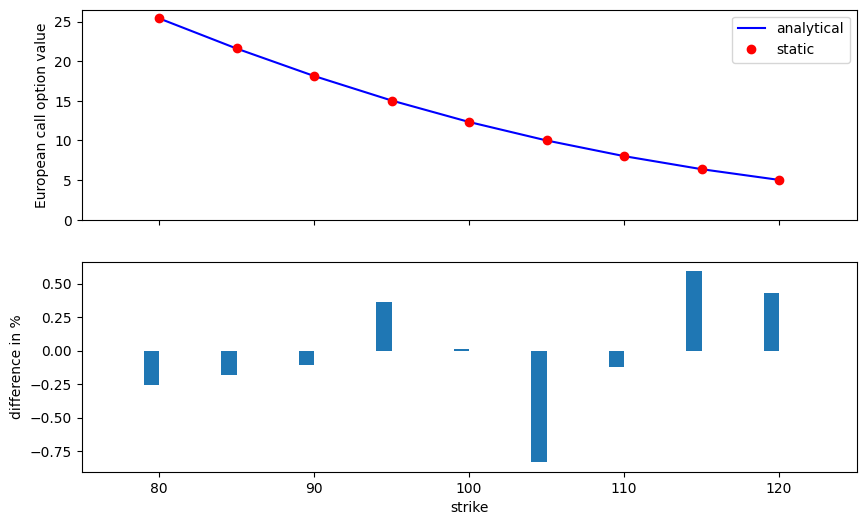

In [18]:
# Biểu đồ giữa bsm và gbm_mcs_stat
import matplotlib.pyplot as plt
print('K_list:',k_list)
print('analytical:',anal_res)
print('static:',stat_res)
plt.figure(figsize=(10, 6))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, stat_res, 'ro', label='static')
ax1.set_ylabel('European call option value')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)
# Dòng mã ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi) 
# có ý nghĩa là tạo ra một biểu đồ thanh (bar chart) 
# để trực quan hóa phần trăm sai lệch giữa hai bộ giá trị 
# anal_res và stat_res. Đây là một cách để so sánh sự khác 
# biệt tương đối giữa hai bộ dữ liệu.

# Ý nghĩa chi tiết:
# Trục X (Horizontal Axis):

# k_list - wi / 2: Các giá trị trên trục X được lấy từ k_list. Biểu thức k_list - wi / 2 dịch chuyển các thanh
#  sang trái một nửa độ rộng của chúng (wi / 2) để căn giữa các thanh tại các vị trí tương ứng trong k_list.
# Chiều cao của các thanh (Height of Bars):

# (anal_res - stat_res) / anal_res * 100: Đây là công thức tính phần trăm sai lệch giữa anal_res và stat_res. Cụ thể:
# anal_res - stat_res: Tính toán sự sai lệch tuyệt đối giữa hai bộ giá trị.
# (anal_res - stat_res) / anal_res: Tính phần trăm sai lệch so với anal_res.
# * 100: Chuyển đổi từ dạng thập phân sang phần trăm.
# Kết quả là, mỗi thanh trên biểu đồ đại diện cho phần trăm sai lệch của stat_res so với anal_res tại mỗi vị trí trong k_list

(75.0, 125.0)

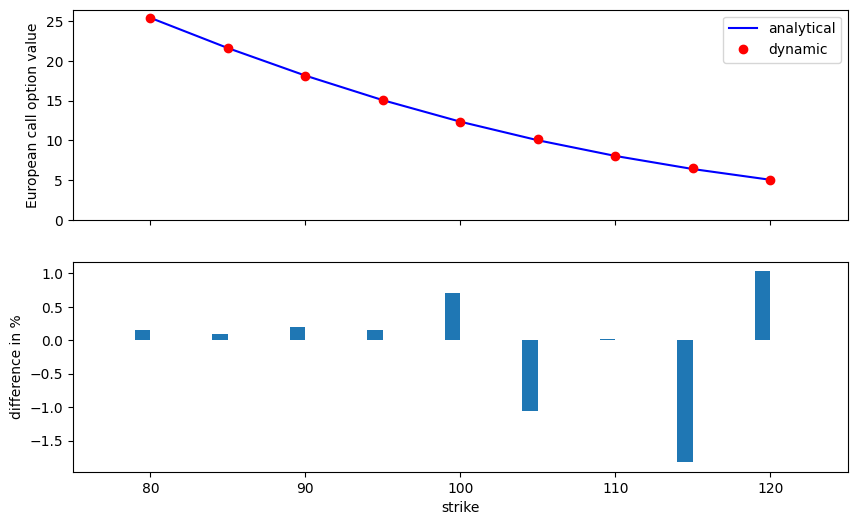

In [19]:
# Biểu đồ tính toán giữa bsm và gbm_mcs_dyna
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, dyna_res, 'ro', label='dynamic')
ax1.set_ylabel('European call option value')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)